# "Voices Heard" Data Analysis

## I. Imports

In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
import yake

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [130]:
df = pd.read_csv("data/voicesHeard.csv")
df = df.drop(labels="Count", axis=1)
df

,Genre,Reports,Age,Gpa,Year,Gender
0,Academic Support and Resources,The limited access to research databases and m...,27,2.18,2,M
1,Academic Support and Resources,I'm having trouble finding the course material...,23,3.11,2,F
2,Academic Support and Resources,It's frustrating to have limited access to res...,20,3.68,2,F
3,Academic Support and Resources,I'm really struggling in one of my classes but...,20,1.30,2,F
4,Academic Support and Resources,I am really struggling with understanding the...,26,2.50,2,F
...,...,...,...,...,...,...
1000,Food and Cantines,26. I have been unable to find food that meets...,18,1.16,4,M
1001,Food and Cantines,27. I have been unable to find food that I can...,20,4.05,2,M
1002,Food and Cantines,28. I have been unable to find food that I enjoy.,22,1.86,3,M
1003,Food and Cantines,29. I have been unable to find food that is he...,20,2.06,2,M


#### Variable Breakdown
We have 1,005 entries along 7 feature columns.
Continuous: ```Age```, ```Gpa```
Categorical: ```Genre```, ```Year```, ```Gender```
Textual: ```Reports```
Unknown: ```Count```

## II. EDA

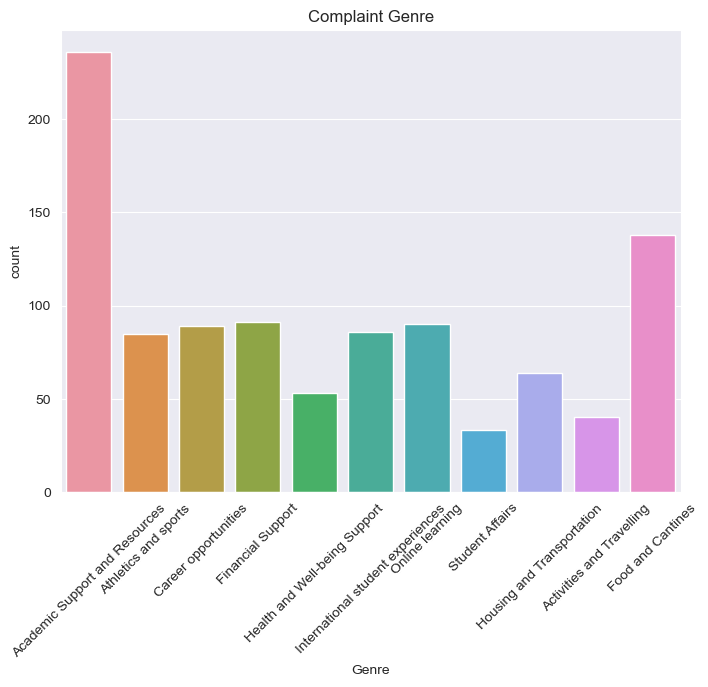

In [131]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="Genre")
plt.xticks(rotation=45)
plt.title("Complaint Genre")
plt.show()

In [137]:
handleText = ["AS&R", "Sports", "CO", "Financing", "Health", "ISE", "Remote", "Affairs", "Housing", "Activities", "Food"]
labels = ["Academic Support and Resources", "Athletics and sports", "Career opportunities", "Financial support", "Health and Well-being Support", "International student exchange", "Online learning", "Student Affairs", "Housing and Transportation", "Activities and Travelling", "Food and Cantines"]

## III. Feature Engineering

In [132]:
df["textLen"] = df["Reports"].apply(lambda x: len(str(x).split()))
df.drop(labels="Reports", axis=1, inplace=True)
df

,Genre,Age,Gpa,Year,Gender,textLen
0,Academic Support and Resources,27,2.18,2,M,26
1,Academic Support and Resources,23,3.11,2,F,24
2,Academic Support and Resources,20,3.68,2,F,35
3,Academic Support and Resources,20,1.30,2,F,31
4,Academic Support and Resources,26,2.50,2,F,24
...,...,...,...,...,...,...
1000,Food and Cantines,18,1.16,4,M,13
1001,Food and Cantines,20,4.05,2,M,12
1002,Food and Cantines,22,1.86,3,M,11
1003,Food and Cantines,20,2.06,2,M,13


In [133]:
df["isMale"] = df["Gender"].apply(lambda x: 1 if x=="M" else 0)
df.drop(labels="Gender", axis=1, inplace=True)
df["Genre"] = df["Genre"].astype("category")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   Genre    1005 non-null   category
 1   Age      1005 non-null   int64   
 2   Gpa      1005 non-null   float64 
 3   Year     1005 non-null   int64   
 4   textLen  1005 non-null   int64   
 5   isMale   1005 non-null   int64   
dtypes: category(1), float64(1), int64(4)
memory usage: 40.7 KB


In [134]:
labelCodes = {l:i for i, l in enumerate(df["Genre"].cat.categories.tolist())}
labelCodes

{'Academic Support and Resources': 0,
 'Activities and Travelling': 1,
 'Athletics and sports': 2,
 'Career opportunities': 3,
 'Financial Support': 4,
 'Food and Cantines': 5,
 'Health and Well-being Support': 6,
 'Housing and Transportation': 7,
 'International student experiences': 8,
 'Online learning': 9,
 'Student Affairs': 10}

In [135]:
df["Genre"] = df["Genre"].apply(lambda x: labelCodes[x]).astype("int64")
df

,Genre,Age,Gpa,Year,textLen,isMale
0,0,27,2.18,2,26,1
1,0,23,3.11,2,24,0
2,0,20,3.68,2,35,0
3,0,20,1.30,2,31,0
4,0,26,2.50,2,24,0
...,...,...,...,...,...,...
1000,5,18,1.16,4,13,1
1001,5,20,4.05,2,12,1
1002,5,22,1.86,3,11,1
1003,5,20,2.06,2,13,1


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Genre    1005 non-null   int64  
 1   Age      1005 non-null   int64  
 2   Gpa      1005 non-null   float64
 3   Year     1005 non-null   int64  
 4   textLen  1005 non-null   int64  
 5   isMale   1005 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 47.2 KB


## IV. Modeling Process